In [1]:
from transformers import pipeline
from PIL import Image
import requests

# load pipe
pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")

# load image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# inference




Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [3]:
depth = pipe(image)["depth"]

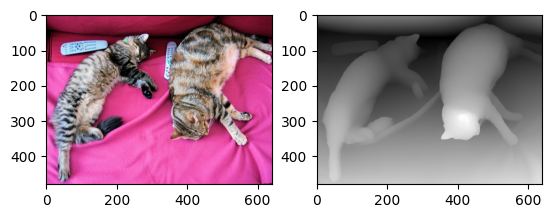

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[1].imshow(depth, cmap="gray")
plt.show()




In [10]:
import time 
import numpy as np

inference_time = []
for i in range(10):
    start = time.time()
    depth = pipe(image)["depth"]
    end = time.time()
    inference_time.append(end-start)

print(f"average inference time: {np.mean(inference_time)}")



average inference time: 0.02221827507019043
